<a href="https://colab.research.google.com/github/AtharKharal/Data_science_with_python/blob/dev-branch/Naive_Bayes_Text_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix

import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
dt= fetch_20newsgroups()

In [7]:
dt.target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [18]:
print(dt.data[0])

From: lerxst@wam.umd.edu (where's my thing)
Subject: WHAT car is this!?
Nntp-Posting-Host: rac3.wam.umd.edu
Organization: University of Maryland, College Park
Lines: 15

 I was wondering if anyone out there could enlighten me on this car I saw
the other day. It was a 2-door sports car, looked to be from the late 60s/
early 70s. It was called a Bricklin. The doors were really small. In addition,
the front bumper was separate from the rest of the body. This is 
all I know. If anyone can tellme a model name, engine specs, years
of production, where this car is made, history, or whatever info you
have on this funky looking car, please e-mail.

Thanks,
- IL
   ---- brought to you by your neighborhood Lerxst ----







In [0]:
# for making it manageable, we restrict our analysis to only a few categories as follows:
categories = ['talk.religion.misc', 'soc.religion.christian', 'sci.space', 'comp.graphics']
train = fetch_20newsgroups(subset="train", categories=categories)
test = fetch_20newsgroups(subset="test", categories=categories)
lrnr = make_pipeline( TfidfVectorizer(), MultinomialNB())

In [25]:
model = lrnr.fit(train.data, train.target)
labels = model.predict(test.data)
labels[:20]

array([2, 0, 1, 0, 1, 2, 1, 1, 0, 1, 2, 2, 2, 2, 2, 1, 0, 2, 1, 2])

In [28]:
mat = confusion_matrix(test.target, labels)
mat

array([[344,  13,  32,   0],
       [  6, 364,  24,   0],
       [  1,   5, 392,   0],
       [  4,  12, 187,  48]])

Text(124.71,0.5,'predicted label')

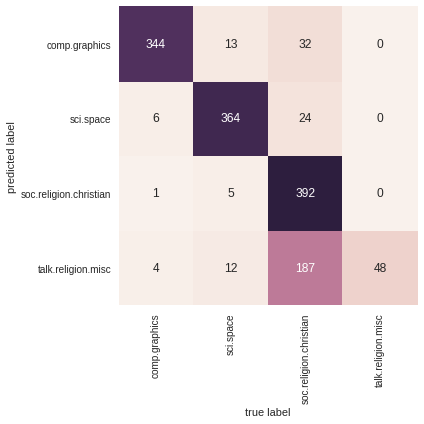

In [37]:
sns.heatmap(mat,cbar= False, square= True, fmt='d', annot=True,
           xticklabels=train.target_names, yticklabels = train.target_names
           )
plt.xlabel('true label')
plt.ylabel('predicted label')
